In [1]:
from ToFCIMSAnalysis.peaklist.kmd import KMD
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Peaklist

Load and run

Initialise the KMD object by providing the path and file name and hit .Run(). This prompts the user to input which kendrick bases the analysis should be performed on. It also asks for a pattern that all the unknown peaks are identified with - this is so these may be queried later

In [1]:
kmd = KMD("./tests/test_data/","test_peaklist.txt")
kmd.Run()

NameError: name 'KMD' is not defined

The matches are writen to a json file that can be read and queried to look for matches

In [3]:
match_data = pd.read_json("./tests/test_data/test_matched_id_data.json",orient="index")
match_data.loc['m132','CH2']

{u'C2H6ON': u'C4H10NO',
 u'm122': None,
 u'm132': None,
 u'm232': None,
 u'm332': None}

multiple KMD objects can be run on seperate peaklists

In [4]:
kmd2 = KMD("./tests/test_data/","test_peaklist2.txt")
kmd2.Run()

List your Kendrick bases: ch2
Matching Peaks on kendrick base CH2
Updated peaklist written to updated_test_peaklist2.txt
Enter common pattern of unknown ion names: u
Finding matched identities
Matched identity summary written to matched_ids_summary_test_peaklist2.json


In [5]:
kmd3 = KMD("./tests/test_data/","test_peaklist3.txt")
kmd3.Run()

List your Kendrick bases: ch2
Matching Peaks on kendrick base CH2
Updated peaklist written to updated_test_peaklist3.txt
Enter common pattern of unknown ion names: u
Finding matched identities
Matched identity summary written to matched_ids_summary_test_peaklist3.json


We can extract the element distributions of the identified species in the peaklists and specify which elements we are interested in

In [6]:
d1 = kmd.ElementDistributions(kmd.peaklist.ion.values, ['C','H','O','N'])
d2 = kmd.ElementDistributions([x for x in kmd2.peaklist.ion.values if "unknown" not in x], ['C','H','O'])
d3 = kmd.ElementDistributions(kmd3.peaklist.ion.values, ['C','H','O'])
d1.head()

,C,H,O,N
0,23.0,23.0,23.0,25.0
1,0.0,0.0,3.0,2.0
2,3.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


These can then be plotted as frequency distributions. Up to 3 different peaklists can be compared on the same plot (more than 3 gets confusing to look at)

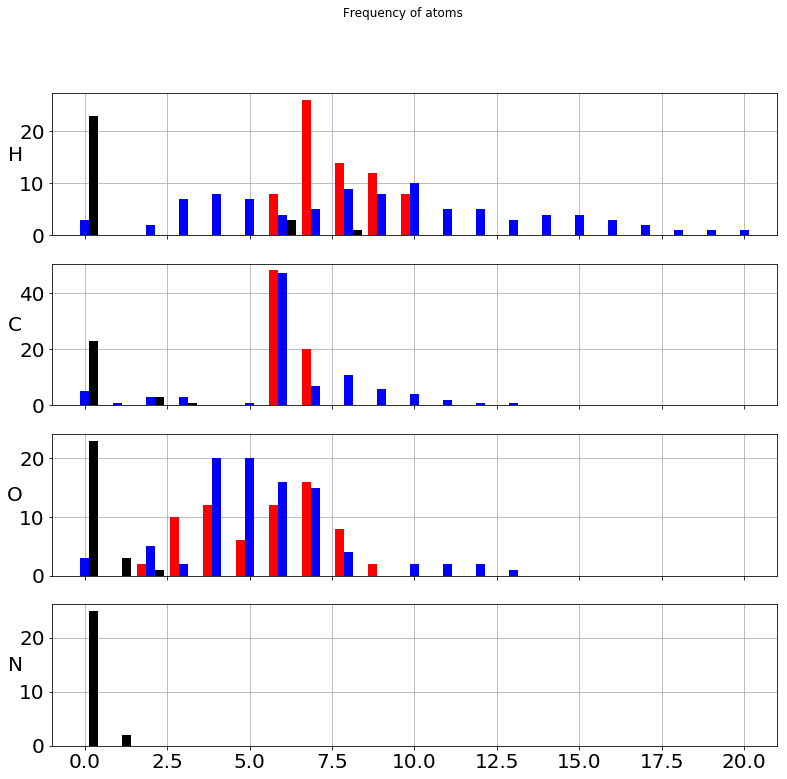

In [7]:
ax = kmd.ElementDistributionsPlot([d3, d2, d1])

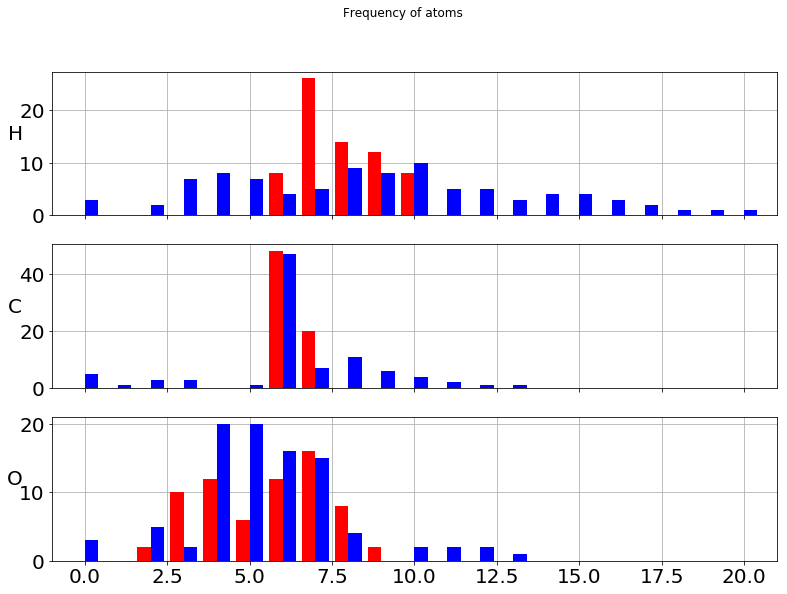

In [8]:
ax = kmd.ElementDistributionsPlot([d3, d2])

The organic characteristics of the identified species can also be calculated. These are the O:C, H:C, N:C and OSc.

In [9]:
org_characteristics = kmd.OrganicCharacteristics(kmd.peaklist.ion);
org_characteristics2 = kmd.OrganicCharacteristics(kmd2.peaklist.ion);
org_characteristics3 = kmd.OrganicCharacteristics(kmd3.peaklist.ion);
org_characteristics3.head()

C:\Python27\lib\site-packages\numpy\core\fromnumeric.py:42: RuntimeWarning: invalid value encountered in rint
  result = getattr(asarray(obj), method)(*args, **kwds)


,ion,I,H,C,O,N,O:C,H:C,N:C,OSc
0,IC6H7O3-,1,7,6,3,0,0.500000,1.166667,NaN,-0.2
1,IC6H8O3-,1,8,6,3,0,0.500000,1.333333,NaN,-0.3
2,IC6H6O2-,1,6,6,2,0,0.333333,1.000000,NaN,-0.3
3,IC6H7NO4-,1,7,6,4,1,0.666667,1.166667,0.166667,-0.7
4,IC7H9O7-,1,9,7,7,0,1.000000,1.285714,NaN,0.7


These can also be plotted.

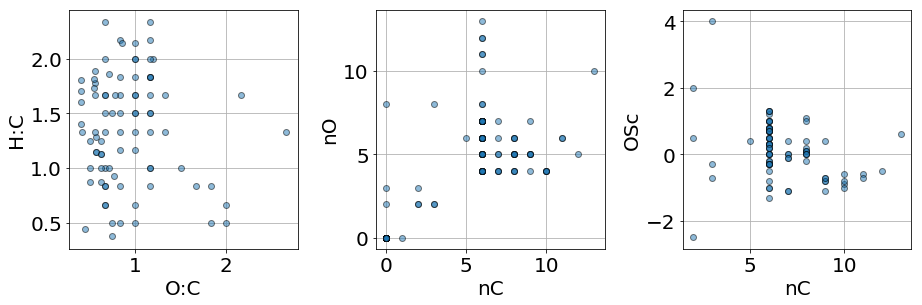

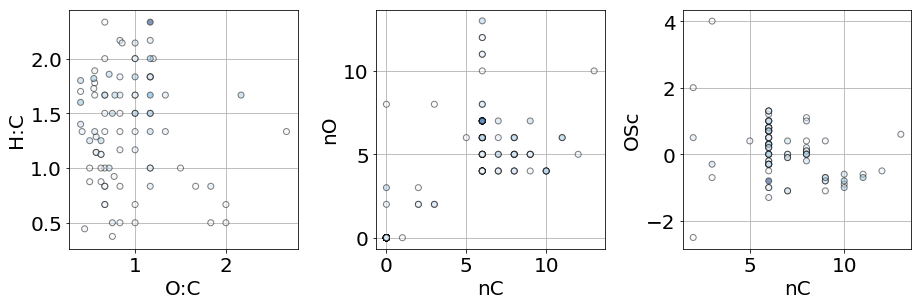

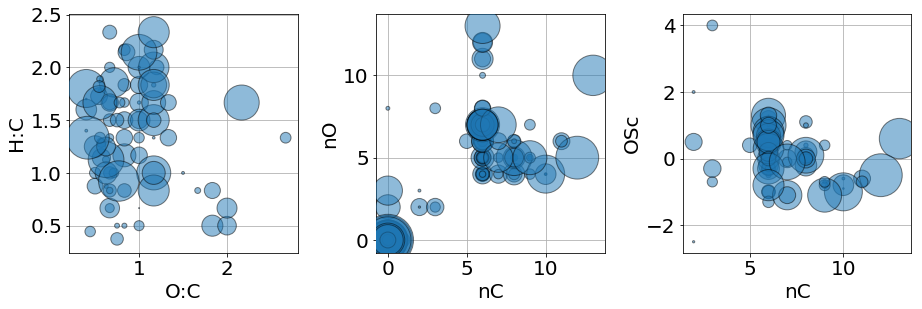

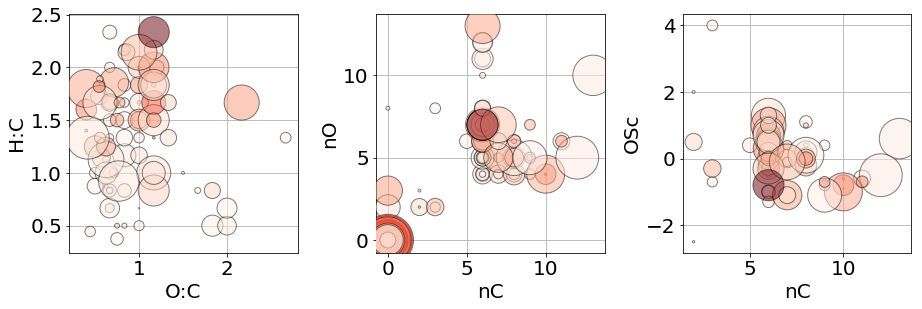

In [10]:
# generate random values. Here you could use peak intensity or something
alphas2 = [abs(x)*i for i, x in enumerate(np.random.randn(org_characteristics2.shape[0]))]
sizes2 = [abs(x)*i*5 for i, x in enumerate(np.random.randn(org_characteristics2.shape[0]))]

kmd.OrganicCharacteristicsPlot(org_characteristics2);
kmd.OrganicCharacteristicsPlot(org_characteristics2, alphas=alphas2);
kmd.OrganicCharacteristicsPlot(org_characteristics2, sizes=sizes2);
kmd.OrganicCharacteristicsPlot(org_characteristics2, cmap="Reds", sizes=sizes2, alphas=alphas2);

## Time series

The package also contains a routine to count the different cycles

In [1]:
from ToFCIMSAnalysis.timeseries.timeseries import TimeSeries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ts = TimeSeries()
# data = pd.read_csv("../brazil1hzHRshort.csv", parse_dates=True, index_col="date:time")
data = pd.read_csv("tests/test_data/timeseries.csv", parse_dates=True, index_col="date:time")
data.head()

,temperature,state_name,m150,m151,m152,m153,m154,m155,m156,m157,...,m591,m592,m593,m594,m595,m596,m597,m598,m599,m600
date:time,,,,,,,,,,,,,,,,,,,,,
2015-10-11 11:10:54,62.04,0,126.879,35.8394,41.9620,18.9772,21.9177,165.993,13.3677,29.6979,...,6.76749,0.130209,1.17704,0.315099,1.16984,0.619629,1.20850,0.326151,2.15955,-0.058400
2015-10-11 11:11:24,56.35,0,133.269,39.3286,39.0736,17.4864,22.2083,161.082,18.6996,29.7746,...,7.60827,0.549669,1.34741,0.659218,1.08103,0.194152,1.43849,0.520368,2.75311,0.881759
2015-10-11 11:11:54,51.22,0,135.194,39.8157,43.2688,27.1620,25.3500,158.040,13.1785,30.5549,...,7.49901,1.732530,1.96174,0.716308,1.50135,0.632518,1.81397,0.395645,1.78711,0.634171
2015-10-11 11:12:24,46.79,0,134.460,37.7058,38.4336,22.7665,18.6913,153.271,16.8391,32.8211,...,6.41910,1.664120,1.94553,1.321940,1.90371,0.794163,2.10082,1.260640,2.92905,1.729330
2015-10-11 11:12:54,42.96,0,131.286,29.6331,39.5913,21.5025,21.1221,157.212,17.4272,29.7351,...,6.02088,1.539170,1.41683,0.754269,1.15849,0.298817,1.17376,0.307338,1.65594,0.286460


Here you can see the figaero cycling in the 'state_name' column of the csv file.

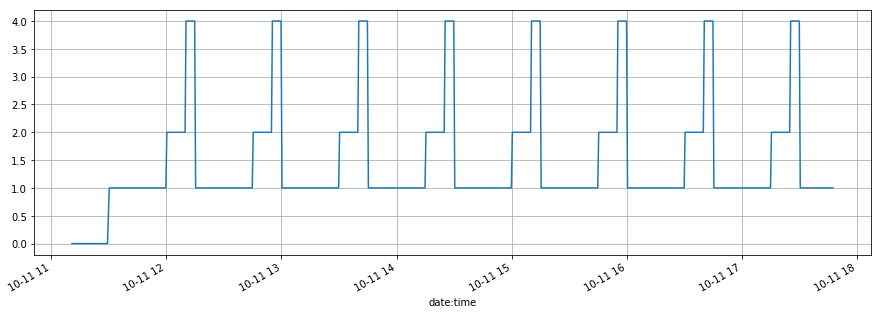

In [3]:
data['state_name'].plot(figsize=(15,5), grid=True);

 The CountCycles method counts the number of cycles within the 'state_name' columns and fills a new column with that count. In this instance it is called 'figaero_cycle'.

In [4]:
# data = ts.CountCycles(df=data,
#                       mask_column_name="state_name",
#                       new_cycle_column_name="figearo_cycle",
#                       last_num_in_seq=5.0,
#                       first_num_in_seq=1.0)
data = ts.CountCycles(df=data,
                      mask_column_name="state_name",
                      new_cycle_column_name="figearo_cycle",
                      last_num_in_seq=4,
                      first_num_in_seq=1)

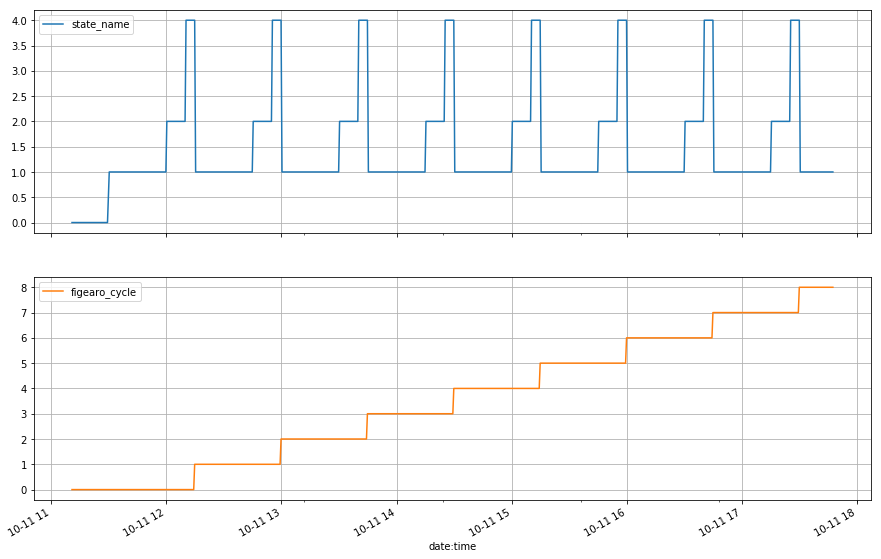

In [5]:
data[['state_name','figearo_cycle']].plot(figsize=(15,10), grid=True, subplots=True);

We use the counted cycles to identify where the integration for the figaero particle data should take place. 

In [6]:
# columns = [x for x in data.columns if "A_" in x and "particle_integrated" not in x]

# data = ts.IntegrateFIGAERO(df=data,
#                            columns_to_integrate=columns,
#                            mask_column_name='state_name',
#                            figaero_cycle_column_name="figearo_cycle",
#                            figaero_integrate_mask_val=[2, 4],
#                            gas_sample_mask_val=1, 
#                            bad_cycles=[14]);

masses = [x for x in data.columns if len(x) == 4][145:150]

data = ts.IntegrateFIGAERO(df=data,
                           columns_to_integrate=masses,
                           mask_column_name='state_name',
                           figaero_cycle_column_name="figearo_cycle",
                           figaero_integrate_mask_val=[2, 4],
                           gas_sample_mask_val=1, 
                           bad_cycles=[]);

100%|████████████████████████████████████████| 451/451 [00:17<00:00, 25.91it/s]


We can now visualise the integrated particle data with the gas data

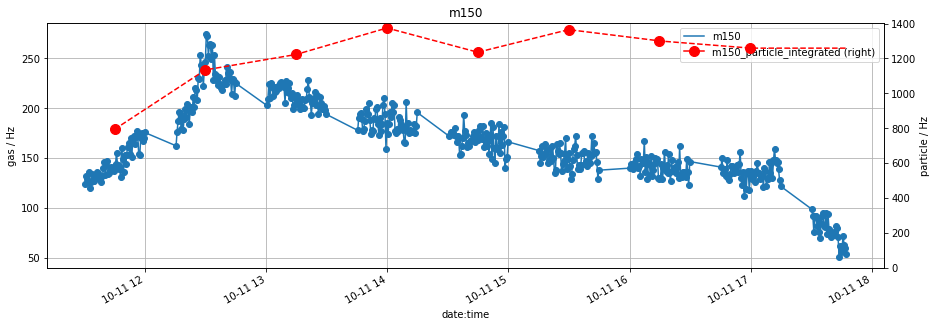

In [7]:
for mass in masses:
    ax = data.loc[(data["state_name"] == 1), mass].plot(marker="o", legend=True, figsize=(15,5));
    data[mass+"_particle_integrated"].interpolate().plot(ax=ax, ls="--", color="r", secondary_y=True);
    data[mass+"_particle_integrated"].plot(ax=ax, marker="o", markersize=10, color="r", secondary_y=True, legend=True, grid=True);
    ax.set_ylabel("gas / Hz");
    ax.right_ax.set_ylabel("particle / Hz");
    ax.right_ax.set_ylim(0,);
    ax.set_title(mass);
    plt.show();
    break

Because we have temperature data we can plot thermograms of the different masses

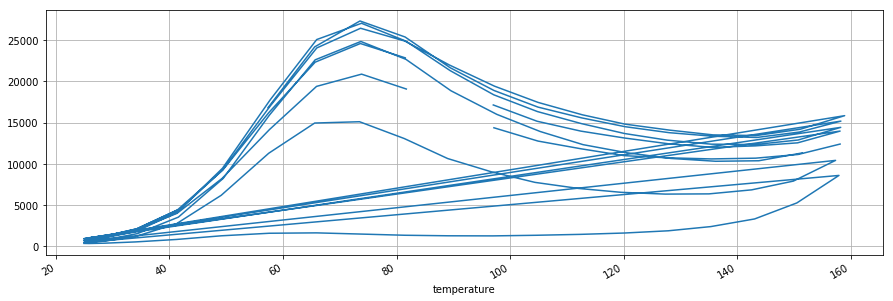

In [10]:
mass = masses[150]

Temperature_data = data.loc[data['state_name'] == 2].set_index("temperature");
Temperature_data[mass].plot(subplots=True, grid=True, figsize=(15,5));

In [11]:
Temperature_data.head()

,state_name,m150,m151,m152,m153,m154,m155,m156,m157,m158,...,m591_particle_integrated,m592_particle_integrated,m593_particle_integrated,m594_particle_integrated,m595_particle_integrated,m596_particle_integrated,m597_particle_integrated,m598_particle_integrated,m599_particle_integrated,m600_particle_integrated
temperature,,,,,,,,,,,,,,,,,,,,,
24.97,2,33.4743,21.4911,25.0146,17.5906,24.1475,71.6662,13.3369,24.7700,9.27092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25.83,2,32.7037,18.8725,14.8222,10.8395,14.9947,60.3381,13.1571,24.4389,13.18880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28.62,2,19.4143,14.2579,18.2801,11.3619,12.1238,69.3139,15.2234,24.9737,10.93000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33.96,2,29.5924,21.3510,16.2496,15.6047,20.1019,74.7651,11.2271,37.8503,10.23670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.21,2,21.1331,14.8768,15.5963,20.7400,16.0214,101.9750,18.1446,61.4538,14.08940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To plot the thermograms, we're only interested during the desorption time

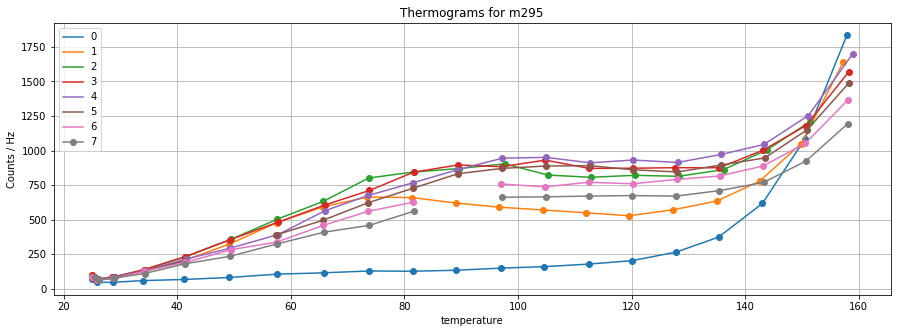

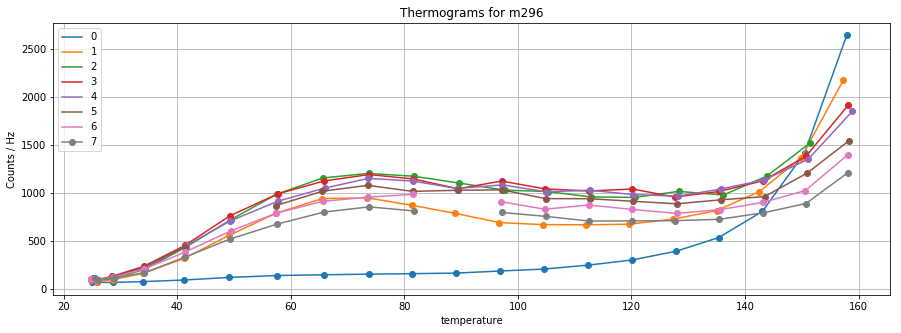

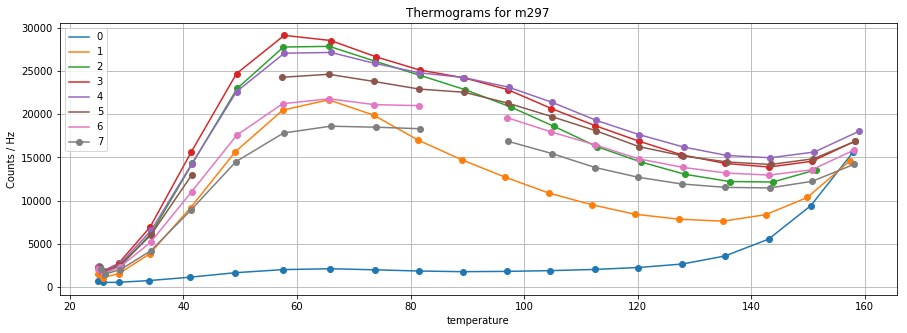

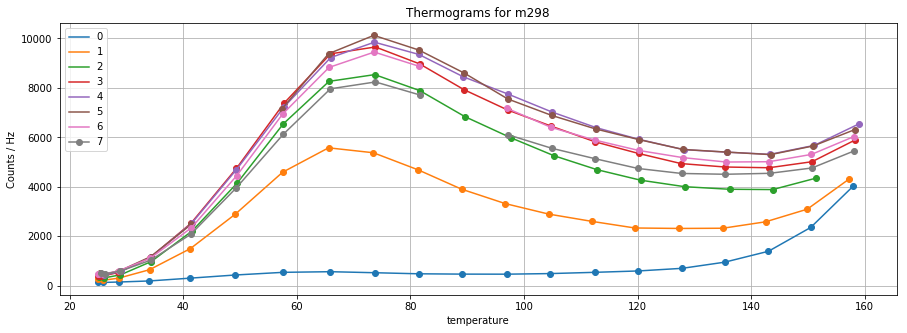

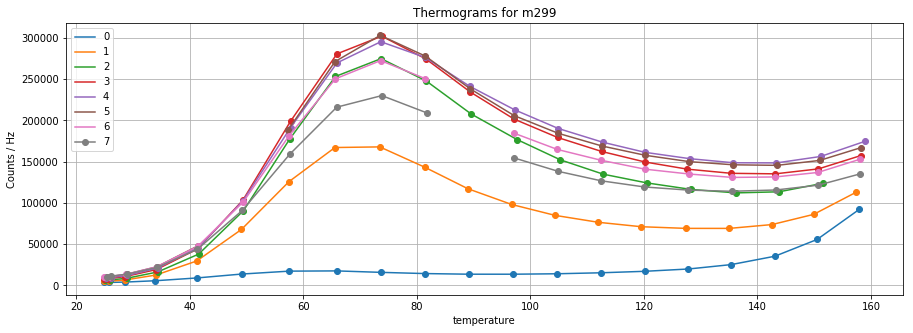

In [13]:
for mass in masses:
    for epoch in np.unique(data['figearo_cycle'])[:-1]:
        ax = Temperature_data.loc[(Temperature_data['figearo_cycle'] == epoch), mass].plot(
                                label=str(epoch), legend=True, marker="o", grid=True, figsize=(15,5));
    ax.set_ylabel("Counts / Hz");
    ax.set_title("Thermograms for "+mass);
    plt.show();

We can extract the relevent thermogram data and store it in a dictionary of dataframes
(for now)

In [15]:
desorptions = ts.ExtractDesorptions(df=data,
                                    columns_to_extract=masses,
                                    mask_column_name="state_name",
                                    figaero_cycle_column_name="figearo_cycle",
                                    thermogram_mask_val=[2],
                                    temperature_dp=2,
                                    bad_cycles=[])

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 45.87it/s]


In [16]:
desorptions[mass].head()

,0,1,2,3,4,5,6,7
temperature,,,,,,,,
24.0,3709.17,4903.32,NaN,7550.07,NaN,NaN,10058.6,NaN
26.0,3652.07,5092.17,6468.625,8155.33,9190.83,10345.09,10786.3,10986.8
28.0,4102.48,6687.53,8740.800,10685.90,12191.80,13507.50,13559.2,13650.9
34.0,5720.71,12606.60,16304.300,19261.00,21074.20,22695.30,22617.4,21828.9
42.0,9068.27,29675.60,38004.700,44060.80,45831.70,47864.30,47499.4,43765.3


We can plot each desorption cycles thermogram as well as their mean and standard deviation. This works best when the data is scaled.

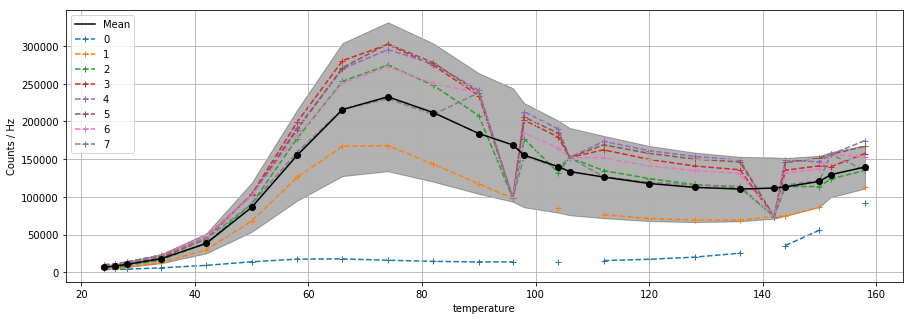

In [17]:
ax = ts.PlotExtractDesorptions(desorptions[mass], figaero_cycles_to_plot=[0,1,2,3,4,5,6,7]);

Because the thermograms have different signal responses, it is best to normalise the signal in order to best assess the shape (and extract the tmax)

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [19]:
desorptions_SS = {}
desorptions_SS[mass] = pd.DataFrame(min_max_scaler.fit_transform(desorptions[mass]),
                                 columns=desorptions[mass].columns,
                                 index=desorptions[mass].index)

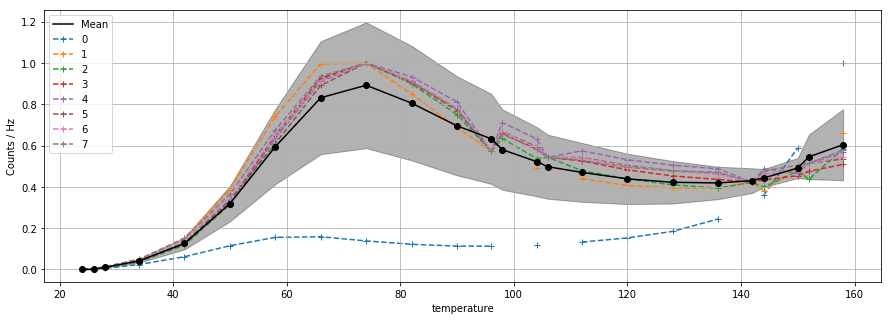

In [21]:
ts.PlotExtractDesorptions(desorptions_SS[mass], figaero_cycles_to_plot=[0,1,2,3,4,5,6,7])

We can also extract TMax data...

In [24]:
tmaxes = ts.GetTMaxes(data, 
                      columns_to_get_tmax=masses,
                      thermogram_mask_val=[2,4], 
                      mask_column_name="state_name",
                      figaero_cycle_column_name="figearo_cycle",
                      temperature_column_name="temperature",
                      bad_cycles=[]
                      );
tmaxes

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 20.00it/s]


,m295,m296,m297,m298,m299
figearo_cycle,,,,,
0,NaN,NaN,NaN,NaN,NaN
1,163.51,163.51,65.58,65.58,73.48
2,165.12,165.12,65.67,73.71,73.71
3,164.57,164.57,57.76,73.83,73.83
4,165.16,165.16,65.95,73.66,73.66
5,164.56,164.56,65.59,73.56,73.56
6,164.44,164.44,65.67,73.63,73.63
7,164.35,164.35,65.91,73.84,73.84


...then do some stats

In [25]:
tmax_stats = tmaxes.describe()
tmax_stats

,m295,m296,m297,m298,m299
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,164.530000,164.530000,64.590000,72.544286,73.672857
std,0.552027,0.552027,3.015344,3.072658,0.132880
min,163.510000,163.510000,57.760000,65.580000,73.480000
25%,164.395000,164.395000,65.585000,73.595000,73.595000
50%,164.560000,164.560000,65.670000,73.660000,73.660000
75%,164.845000,164.845000,65.790000,73.770000,73.770000
max,165.160000,165.160000,65.950000,73.840000,73.840000


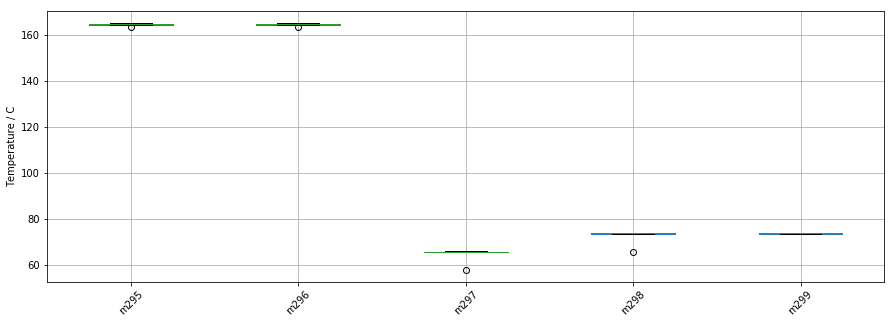

In [26]:
ax = tmaxes[tmaxes.columns].boxplot(figsize=(15,5));
ax.set_ylabel("Temperature / C");
ax.xaxis.set_tick_params(rotation=45);